<font color='magenta' size='5'><b>Welcome to the Machine Learning Assignment!</b></font>


## Objective
This assignment is designed to give you practical experience with a complete machine learning workflow, applying 10-fold cross validation, and running classification models on a prepared dataset.

## Dataset Overview
You are provided with a dataset already split into training and test sets. Use the training set for developing and validating your models, and the test set for final evaluation. 

## Brief information about the dataset 
This dataset contains data from a higher education institution on various variables related to undergraduate students, including demographics, social-economic factors, and academic performance, to investigate the impact of these factors on student dropout.



## Task 1: Data Loading (2 mark)
Import necessary libraries and load the training and test datasets. Show the first five rows of each dataset to confirm loading, and use the info() method to review the details of the columns in each dataset.

In [1]:
# Import the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc

In [2]:
# # Load the datasets
train_data = pd.read_csv('train_data.csv')

test_data = pd.read_csv('test_data.csv')

In [3]:
## Show the first five entries from both the training and testing datasets
train_data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,2,4,1,9,1,3,1,1,4,4,...,0,5,5,5,13.80000,0,12.4,0.5,1.79,1
1,1,8,1,10,1,1,1,1,28,6,...,0,6,6,2,11.50000,0,12.7,3.7,-1.70,0
2,1,8,3,12,1,1,1,1,14,8,...,0,8,11,7,12.94375,0,12.4,0.5,1.79,1
3,1,8,1,6,1,1,1,13,27,2,...,0,5,9,2,13.50000,0,7.6,2.6,0.32,0
4,1,1,2,9,1,1,1,1,14,5,...,0,5,5,0,0.00000,0,15.5,2.8,-4.06,0


In [4]:
test_data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,4,1,9,1,2,1,3,27,3,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,0
1,1,8,1,9,1,1,1,13,27,6,...,0,5,13,1,11.000000,0,9.4,-0.8,-3.12,0
2,1,8,3,12,1,1,1,3,3,10,...,0,8,9,8,14.444444,0,13.9,-0.3,0.79,1
3,1,8,1,12,1,1,1,1,27,10,...,0,8,8,8,15.075000,0,13.9,-0.3,0.79,1
4,5,12,1,4,1,1,1,1,1,5,...,0,6,7,0,0.000000,0,8.9,1.4,3.51,0


In [5]:
## Use the info() method to review the details of the columns in each dataset.
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2904 entries, 0 to 2903
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  2904 non-null   int64  
 1   Application mode                                2904 non-null   int64  
 2   Application order                               2904 non-null   int64  
 3   Course                                          2904 non-null   int64  
 4   Daytime/evening attendance                      2904 non-null   int64  
 5   Previous qualification                          2904 non-null   int64  
 6   Nacionality                                     2904 non-null   int64  
 7   Mother's qualification                          2904 non-null   int64  
 8   Father's qualification                          2904 non-null   int64  
 9   Mother's occupation                      

In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  726 non-null    int64  
 1   Application mode                                726 non-null    int64  
 2   Application order                               726 non-null    int64  
 3   Course                                          726 non-null    int64  
 4   Daytime/evening attendance                      726 non-null    int64  
 5   Previous qualification                          726 non-null    int64  
 6   Nacionality                                     726 non-null    int64  
 7   Mother's qualification                          726 non-null    int64  
 8   Father's qualification                          726 non-null    int64  
 9   Mother's occupation                        

## Task 2: Separate Data and Labels (1 mark)
Separate features and target labels for both training and test datasets.

Last column "Target" has the labels for both training and test data. 

Label 1= Graduate and Label 0 = Dropout



In [7]:
# Separating features and target variable for the training data
X_train = train_data.drop(['Target'], axis=1)
y_train = train_data['Target']

In [8]:
# Now let's separate the features and target variable for the test data
X_test = test_data.drop(['Target'], axis=1)
y_test = test_data['Target']

## Task 3: Check for Missing Values (1 mark)
Check and handle any missing values in the training and test datasets.

In [9]:
# Let's check for missing values in the training dataset
print(train_data.isnull().sum())

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [10]:
# Let's also check for missing values in the test dataset
print(test_data.isnull().sum())

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

Hmm seems like there are no missing values in both the training and the test datasets.

## Task 4: Data Overview (1 marks)
Check the size of the dataset, including the number of training samples, test samples and features. Print these details.

In [11]:
# Now, let's check how the training dataset looks like
print(train_data.shape)

(2904, 35)


In [12]:
# Now, let's check how the test dataset looks like
print(test_data.shape)

(726, 35)


In [13]:
# Now, let's also check the descriptive stats of the variables for the training dataset
print(train_data.describe())

       Marital status  Application mode  Application order       Course  \
count     2904.000000       2904.000000        2904.000000  2904.000000   
mean         1.187328          6.814394           1.739325     9.974862   
std          0.616708          5.282151           1.331883     4.350283   
min          1.000000          1.000000           0.000000     1.000000   
25%          1.000000          1.000000           1.000000     6.000000   
50%          1.000000          8.000000           1.000000    11.000000   
75%          1.000000         12.000000           2.000000    13.000000   
max          6.000000         18.000000           6.000000    17.000000   

       Daytime/evening attendance  Previous qualification  Nacionality  \
count                 2904.000000             2904.000000  2904.000000   
mean                     0.885675                2.522039     1.252755   
std                      0.318260                3.920700     1.755114   
min                      0.0

In [14]:
# Now, let's also check the descriptive stats of the variables for the test dataset
print(test_data.describe())

       Marital status  Application mode  Application order      Course  \
count      726.000000        726.000000         726.000000  726.000000   
mean         1.172176          6.793388           1.793388    9.778237   
std          0.598248          5.141449           1.341645    4.301611   
min          1.000000          1.000000           1.000000    1.000000   
25%          1.000000          1.000000           1.000000    6.000000   
50%          1.000000          8.000000           1.000000   10.000000   
75%          1.000000         12.000000           2.000000   12.000000   
max          5.000000         17.000000           6.000000   17.000000   

       Daytime/evening attendance  Previous qualification  Nacionality  \
count                  726.000000              726.000000   726.000000   
mean                     0.895317                2.674931     1.201102   
std                      0.306356                4.077403     1.461525   
min                      0.000000    

In [15]:
# Let's also check the size of each set
print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 2904
Test set size: 726


In [16]:
# Let's also normalize the data before we set-up the 10-fold cross validation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Task 5: 10-fold Cross Validation (1 marks)
Implement 10-fold cross validation on your standardized training data to validate the performance of your models.

In [17]:
# Let's use Ridge model and set the alpha equal to 0.1
ridge_model = Ridge(alpha=1.0)

# Let's create a set of 10 folds to be used for cross-validation
kf = KFold(n_splits = 10, shuffle = True, random_state = 42)

# Now let's Perform cross-validation
cv_results = cross_val_score(ridge_model, X_train_scaled, y_train, cv=kf, scoring='neg_mean_squared_error')

# Print the results
print("Cross-validation accuracy scores:", cv_results)
print("Mean accuracy:", cv_results.mean())

Cross-validation accuracy scores: [-0.1030724  -0.07869587 -0.07970593 -0.07683901 -0.07621911 -0.08936018
 -0.09626299 -0.07289969 -0.07834078 -0.06988021]
Mean accuracy: -0.08212761689531764


## Task 6: Model Implementation and Hyperparameter Tuning
Develop at least two different classification models. 


### Part A: First Classification Model (2 marks)

Model Implementation (1 mark): Implement your first classification model using any set of initial hyperparameters. Explain your choice of model and the initial parameters you selected.

Parameter Tuning (1 mark): Apply cross-validation to tune the parameters. 


In [18]:
# Initialize the logistic regression model with initial hyperparameters
model = LogisticRegression(max_iter=1000, random_state=42)

# Define the hyperparameters grid to search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, scoring='accuracy')

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_

### Part B: Second Classification Model (2 marks)

Model Implementation (1 mark): Implement your second classification model with a different set of initial hyperparameters. Provide a rationale for your choice of model and the parameters.

Parameter Tuning (1 mark): Use cross-validation to refine the parameters.

In [19]:
# Initialize the Random Forest classifier with initial hyperparameters
model_rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Define the hyperparameters grid to search
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15]
}

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=param_grid_rf, cv=10, scoring='accuracy')

# Fit the model
grid_search_rf.fit(X_train_scaled, y_train)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_

## Task 7: Summarize the comparison of the two models in terms of accuracy and confusion matrices(1 mark). Plot the ROC-AUC Curve (1 mark).

In [20]:
# Predictions for Logistic Regression model
y_pred_lr = grid_search.predict(X_test_scaled)

# Predictions for Random Forest model
y_pred_rf = grid_search_rf.predict(X_test_scaled)

# Confusion matrix for Logistic Regression model
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Confusion matrix for Random Forest model
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("Confusion Matrix - Logistic Regression:")
print(conf_matrix_lr)

print("\nConfusion Matrix - Random Forest:")
print(conf_matrix_rf)

Confusion Matrix - Logistic Regression:
[[226  37]
 [ 25 438]]

Confusion Matrix - Random Forest:
[[220  43]
 [ 25 438]]


In [21]:
# Calculate accuracy for Logistic Regression model
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Calculate accuracy for Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Accuracy of Logistic Regression model:", accuracy_lr)
print("Accuracy of Random Forest model:", accuracy_rf)

Accuracy of Logistic Regression model: 0.9146005509641874
Accuracy of Random Forest model: 0.90633608815427


In [22]:
# Calculate ROC curve and AUC for Logistic Regression model
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Calculate ROC curve and AUC for Random Forest model
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

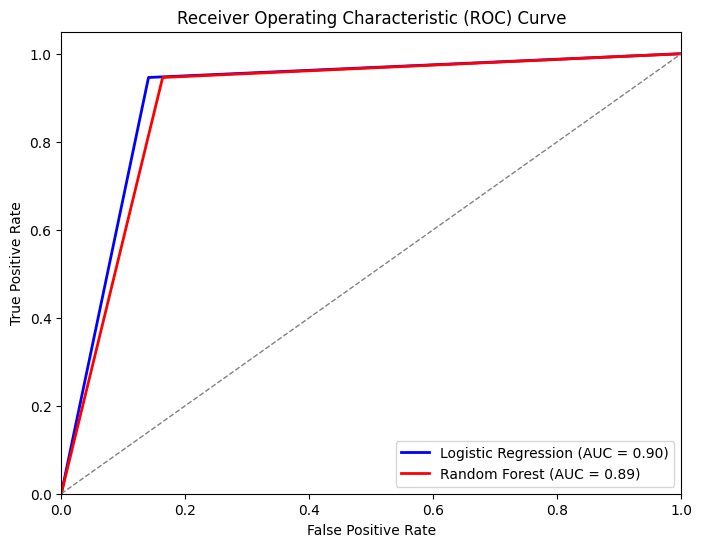

In [23]:
# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Task 8: Friendly Competition for Highest Accuracy (3 marks)

Let's make this interesting! Participate in a friendly competition with your classmates to achieve the highest accuracy on the test set. To add a little extra fun, we will maintain a leaderboard on the classroom whiteboard, updating it regularly to showcase the top performances. 

This is a great opportunity to learn from each other, push your skills to the limit, and maybe even earn some bragging rights!

Best of luck, and let’s see what you can achieve!


In [24]:
print("Test set accuracy for the chosen model:", accuracy_score(y_test, y_pred_lr))

Test set accuracy for the chosen model: 0.9146005509641874


**Note to the Prof:** I used the previous lab sessions and ChatGPT as reference for improving some parts of this notebook.